.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

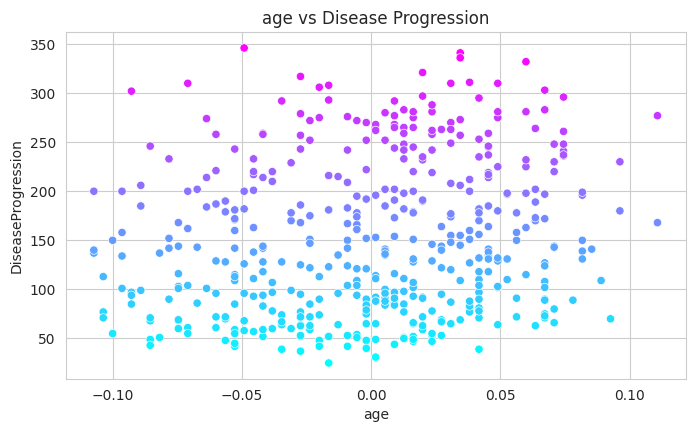

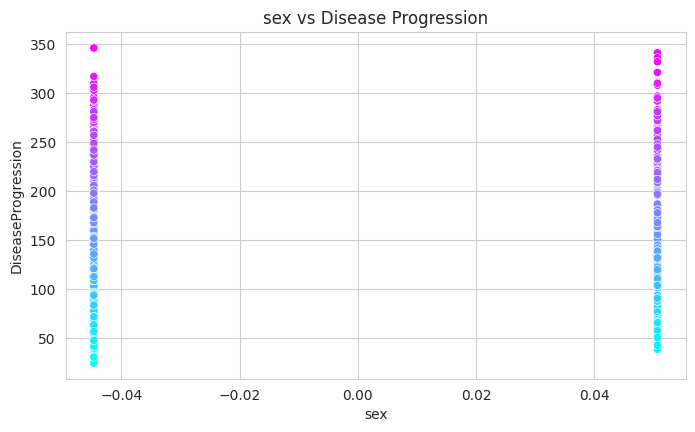

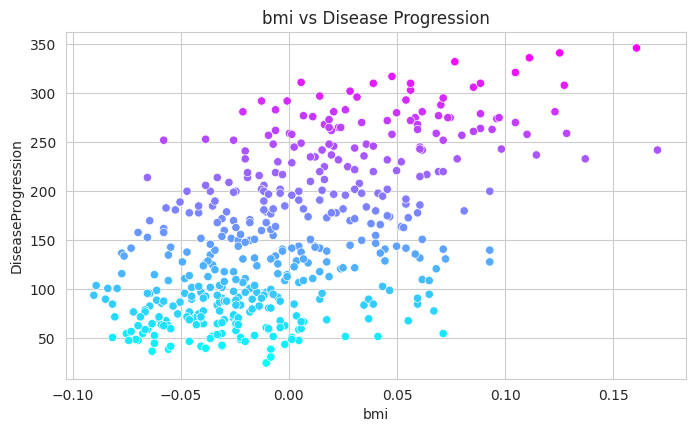

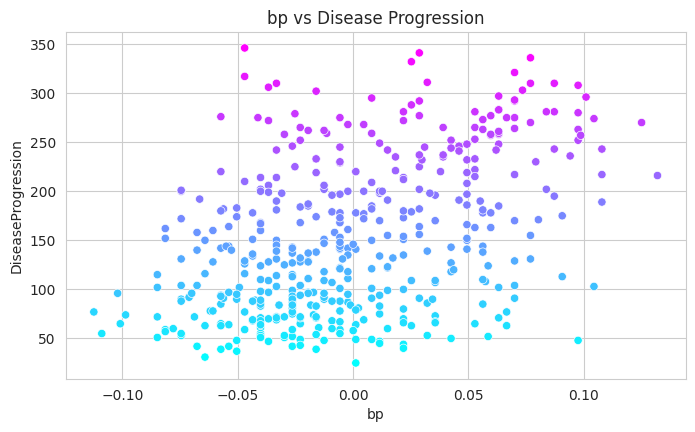

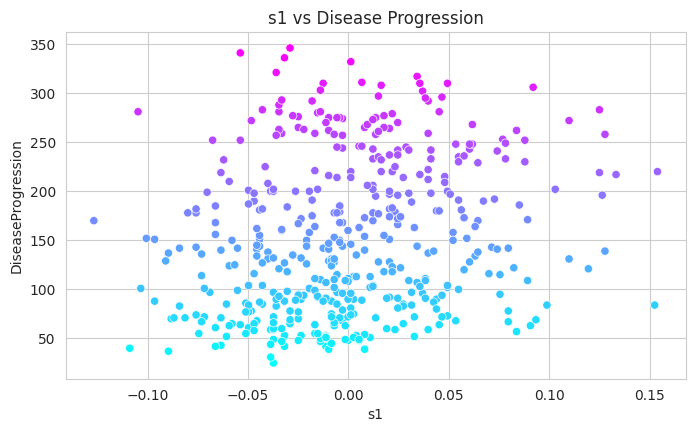

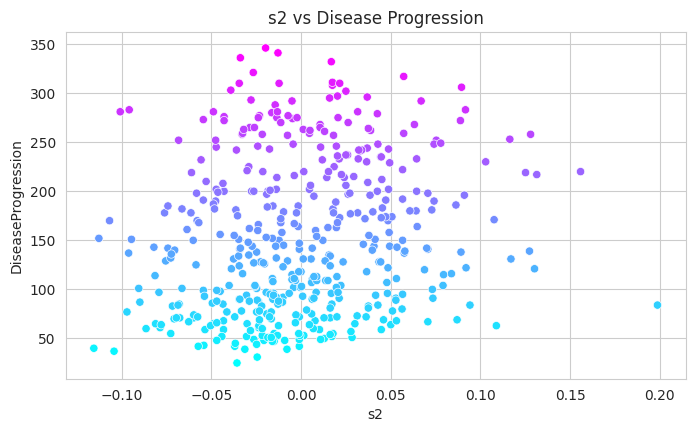

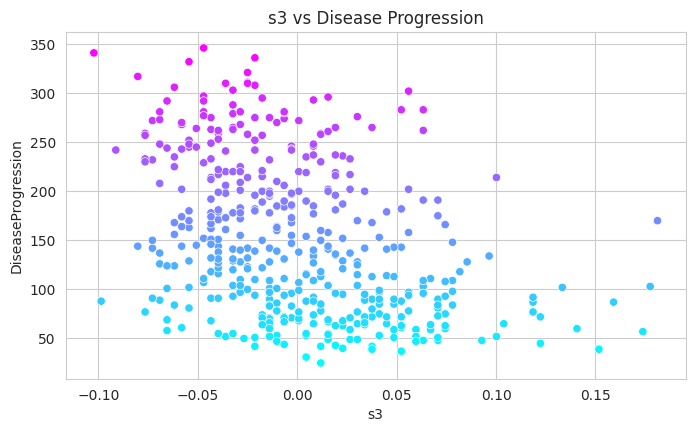

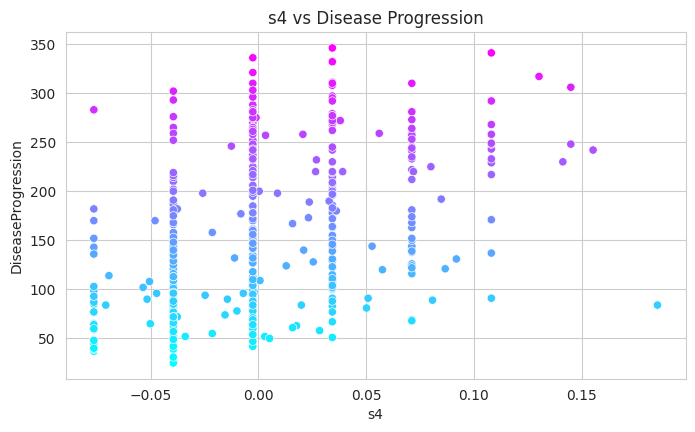

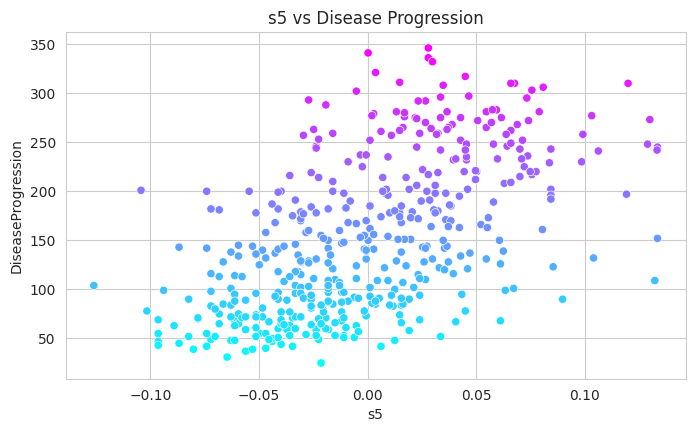

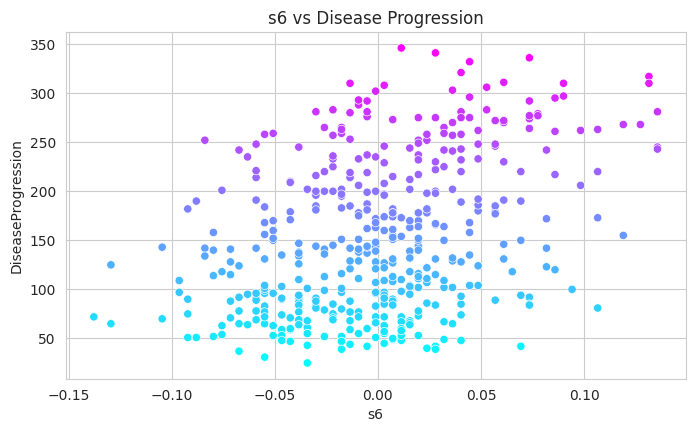

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)
LinearRegression()
First 5 Predicted Values: [116.0566433   82.3085256  160.86715899 189.18169509  75.32179675]
First 5 Expected Values: [ 79.  55. 109. 178.  39.]


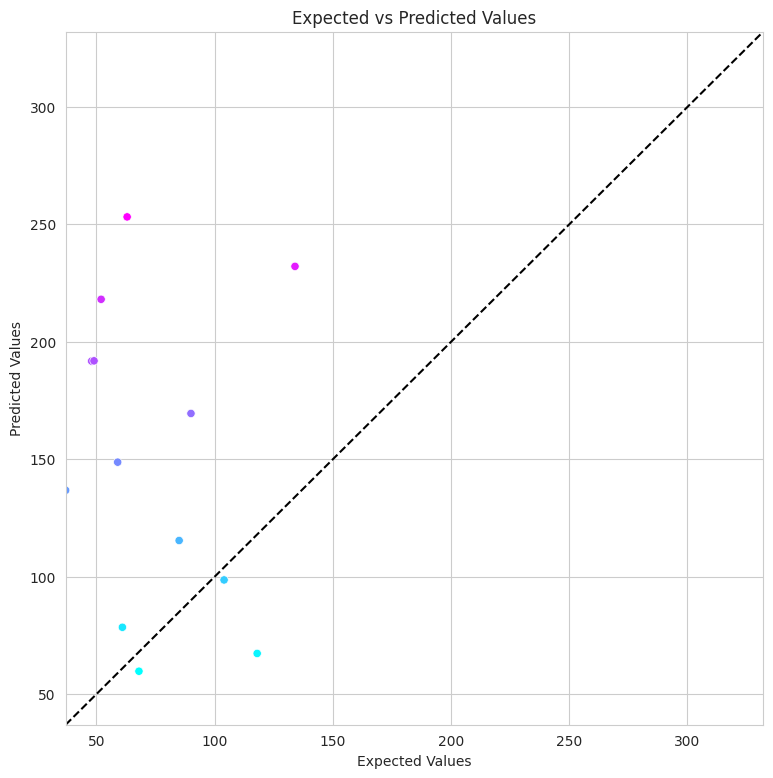

Mean Squared Error (MSE): 3212.5946
R-squared (R²): 0.5772


In [17]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Load the Dataset
diabetes = load_diabetes()

# Display dataset description
print(diabetes.DESCR)

# Confirm shape of data and target
print(f"Data shape: {diabetes.data.shape}")
print(f"Target shape: {diabetes.target.shape}")
print(f"Feature names: {diabetes.feature_names}")

# Create a DataFrame for features
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target column to the DataFrame
data['DiseaseProgression'] = diabetes.target

# Step 2: Display First Few Rows and Summary Stats
pd.options.display.float_format = '{:.4f}'.format
pd.options.display.width = 100
print("First few rows of data:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())

# Step 3: Visualize Features vs Target
sns.set_style('whitegrid')

for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))
    sns.scatterplot(data=data, x=feature, y='DiseaseProgression', hue='DiseaseProgression', palette='cool', legend=False)
    plt.title(f"{feature} vs Disease Progression")
    plt.show()

# Step 4: Split the Data
X = data.drop(columns='DiseaseProgression')  # Features
y = data['DiseaseProgression']               # Target variable

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Confirm the shapes of the training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Step 5: Train the Model
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

# Display the trained model
print(linear_regression)

# Step 6: Test the Model
# Make predictions on the test set
predicted = linear_regression.predict(X_test)

# Store the expected values
expected = y_test

# Display the first five predictions and their corresponding expected values
print("First 5 Predicted Values:", predicted[:5])
print("First 5 Expected Values:", expected[:5].values)  # Convert to NumPy array if necessary

# Step 7: Create a DataFrame for Expected and Predicted Values
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

# Create the scatter plot
plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

# Set the x- and y-axis limits to use the same scale
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)
axes.set_ylim(start, end)

# Plot a diagonal dashed line for perfect predictions
plt.plot([start, end], [start, end], 'k--')

# Add labels and title
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.title('Expected vs Predicted Values')
plt.show()

# Step 8: Evaluate the Model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(expected, predicted)

# Calculate R-squared (R²)
r2 = r2_score(expected, predicted)

# Display the metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")